In [2]:
from sklearn.datasets import make_classification

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
X,Y=make_classification(n_classes=2,n_samples=400,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=3)
Y[Y==0]=-1

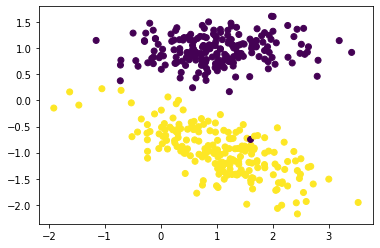

In [36]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [37]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [38]:

mySVM = SVM(C=1000)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400000.0
19077.117938808915


In [39]:
def plotHyperplane(w1,w2,b):
    
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

In [40]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-10.58712896 -35.29748558]] 5.0


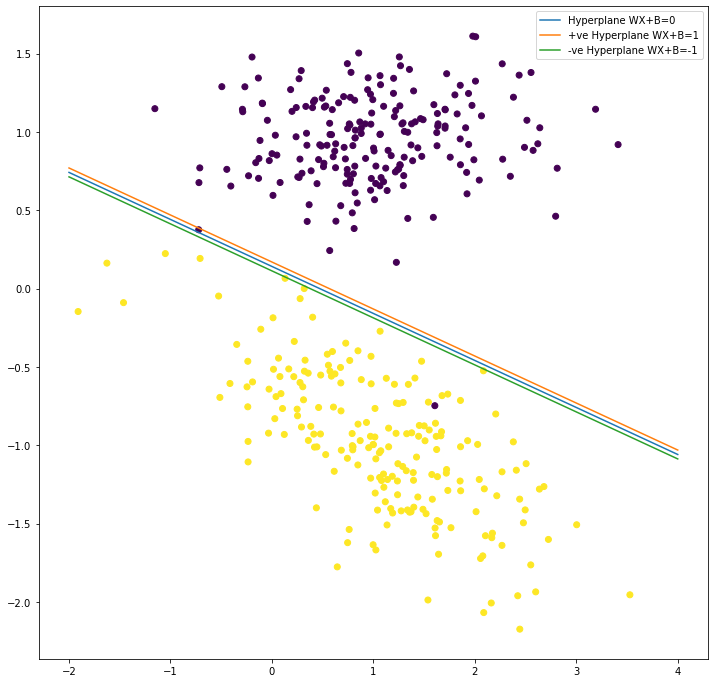

In [41]:
plotHyperplane(W[0,0],W[0,1],B)


## for non-linearly seperable data

In [45]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [46]:
X,Y=make_circles(n_samples=500,noise=0.04)

In [48]:
print(X.shape,Y.shape)

(500, 2) (500,)


<function matplotlib.pyplot.show(close=None, block=None)>

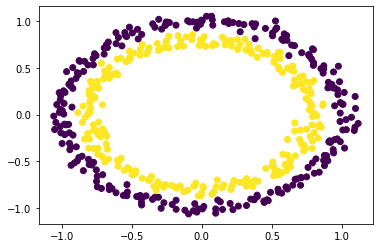

In [55]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show

In [58]:
def phi(X):
    """non linear transformation"""
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    X_=np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=X3
    return X_


In [61]:
X_=phi(X)
X_.shape

(500, 3)

In [90]:
def plot3d(X_,show):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection="3d")
    X1=X_[:,0]
    X2=X_[:,1]
    X3=X_[:,2]
    ax.scatter(X1,X2,X3,zdir="z",s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

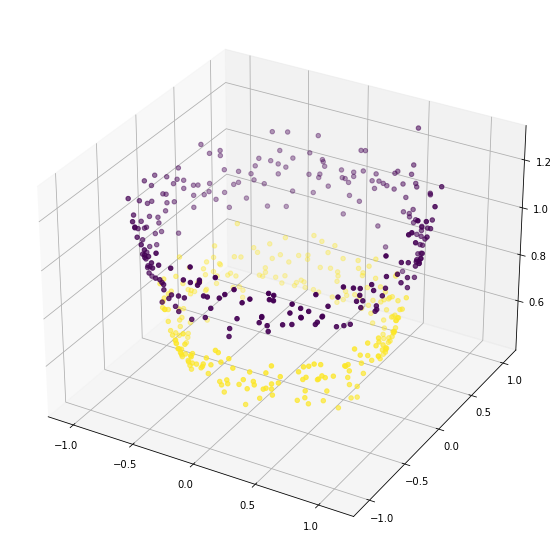

<Axes3DSubplot:>

In [91]:
plot3d(X_,True)

In [68]:
#logistic classifier

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [73]:
lr=LogisticRegression()

In [74]:
lr.fit(X,Y)

LogisticRegression()

In [75]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print(acc*100)

44.8


In [77]:
acc1=cross_val_score(lr,X_,Y,cv=5).mean()
print(acc1*100)

99.60000000000001


In [78]:
lr.fit(X_,Y)

LogisticRegression()

In [83]:
wts=lr.coef_

In [84]:
bias=lr.intercept_

In [85]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))

In [86]:
print(xx,yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]] [[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [88]:
z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81556802 0.81492276 0.8142775  0.81363223]
 [0.81861436 0.8179691  0.81732384 0.81667858]
 [0.82166071 0.82101544 0.82037018 0.81972492]
 [0.82470705 0.82406179 0.82341652 0.82277126]]


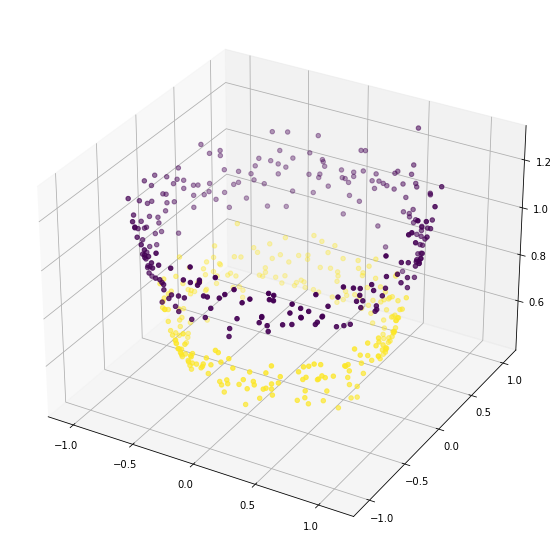

In [94]:
ax=plot3d(X_,True)

## KERNEL BASED SVM

In [95]:
from sklearn import svm

In [97]:
svc=svm.SVC()#Rbf kernel default is used and is best for circular dataset

In [98]:
svc.fit(X,Y)

SVC()

In [99]:
svc.score(X,Y)

0.994

CUSTOM KERNEL


In [100]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T)+1)
svc=svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

0.996